## Импортирование необходимых библиотек

In [585]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [586]:
data = pd.read_csv("cars2.csv")

In [587]:
data.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [588]:
data_features = list(zip(
[i for i in data.columns], # название признака
zip(
    [str(i) for i in data.dtypes], # типы колонок
    [i for i in data.isnull().sum()] # количество пропусков в колонке
)))
data_features # Признаки с типом данных и количеством пропусков

[('mileage', ('int64', 0)),
 ('make', ('object', 0)),
 ('model', ('object', 143)),
 ('fuel', ('object', 0)),
 ('gear', ('object', 182)),
 ('offerType', ('object', 0)),
 ('price', ('int64', 0)),
 ('hp', ('float64', 29)),
 ('year', ('int64', 0))]

## Устранение пропусков

In [589]:
# Доля (процент) пропусков для каждого признака
[(c, data[c].isnull().mean()) for c in data.columns]

[('mileage', 0.0),
 ('make', 0.0),
 ('model', 0.0030815644865854973),
 ('fuel', 0.0),
 ('gear', 0.003921991164745178),
 ('offerType', 0.0),
 ('price', 0.0),
 ('hp', 0.0006249326581187372),
 ('year', 0.0)]

In [590]:
# Удаление колонок, содержащих пустые значения
data.dropna(axis=1, how='any')

,mileage,make,fuel,offerType,price,year
0,235000,BMW,Diesel,Used,6800,2011
1,92800,Volkswagen,Gasoline,Used,6877,2011
2,149300,SEAT,Gasoline,Used,6900,2011
3,96200,Renault,Gasoline,Used,6950,2011
4,156000,Peugeot,Gasoline,Used,6950,2011
...,...,...,...,...,...,...
46400,99,Fiat,Electric/Gasoline,Pre-registered,12990,2021
46401,99,Fiat,Electric/Gasoline,Pre-registered,12990,2021
46402,99,Fiat,Electric/Gasoline,Pre-registered,12990,2021
46403,99,Fiat,Electric/Gasoline,Pre-registered,12990,2021


In [591]:
# Удаление колонок с высоким процентом пропусков (более 50%)
data.dropna(axis=1, thresh=730)

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
...,...,...,...,...,...,...,...,...,...
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


In [592]:
# Заполним пропуски hp средними значениями
def impute_na(df, variable, value):
    df[variable].fillna(value, inplace=True)
impute_na(data, 'hp', data['hp'].mean())

In [593]:
# Убедимся, что признак hp не имеет пустых значений
data.isnull().sum()

mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp             0
year           0
dtype: int64

## Кодирование категориальных признаков

In [594]:
from sklearn.preprocessing import LabelEncoder

In [595]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(data['gear'])

In [596]:
data['gear'].unique()

array(['Manual', 'Automatic', nan, 'Semi-automatic'], dtype=object)

In [597]:
np.unique(cat_enc_le)

array([0, 1, 2, 3])

In [598]:
le.inverse_transform([0, 1, 2, 3])

array(['Automatic', 'Manual', 'Semi-automatic', nan], dtype=object)

In [599]:
data['make'].unique()

array(['BMW', 'Volkswagen', 'SEAT', 'Renault', 'Peugeot', 'Toyota',
       'Opel', 'Mazda', 'Ford', 'Mercedes-Benz', 'Chevrolet', 'Audi',
       'Fiat', 'Kia', 'Dacia', 'MINI', 'Hyundai', 'Skoda', 'Citroen',
       'Infiniti', 'Suzuki', 'SsangYong', 'smart', 'Cupra', 'Volvo',
       'Jaguar', 'Porsche', 'Nissan', 'Honda', 'Lada', 'Mitsubishi',
       'Others', 'Lexus', 'Jeep', 'Maserati', 'Bentley', 'Land', 'Alfa',
       'Subaru', 'Dodge', 'Microcar', 'Lamborghini', 'Baic', 'Tesla',
       'Chrysler', '9ff', 'McLaren', 'Aston', 'Rolls-Royce', 'Alpine',
       'Lancia', 'Abarth', 'DS', 'Daihatsu', 'Ligier', 'Ferrari',
       'Caravans-Wohnm', 'Aixam', 'Piaggio', 'Zhidou', 'Morgan',
       'Maybach', 'Tazzari', 'Trucks-Lkw', 'RAM', 'Iveco', 'DAF',
       'Alpina', 'Polestar', 'Brilliance', 'FISKER', 'Cadillac',
       'Trailer-Anhänger', 'Isuzu', 'Corvette', 'DFSK', 'Estrima'],
      dtype=object)

In [600]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [601]:
#CountEncoder
from category_encoders.count import CountEncoder as ce_CountEncoder

In [602]:
ce_CountEncoder1 = ce_CountEncoder()
data_COUNT_ENC = ce_CountEncoder1.fit_transform(data[data.columns.difference(['model'])])

In [603]:
data_COUNT_ENC.head()

,fuel,gear,hp,make,mileage,offerType,price,year
0,15244,30380,116.0,2405,235000,40122,6800,2011
1,28864,30380,122.0,6931,92800,40122,6877,2011
2,28864,30380,160.0,1924,149300,40122,6900,2011
3,28864,30380,110.0,2830,96200,40122,6950,2011
4,28864,30380,156.0,1232,156000,40122,6950,2011


In [604]:
data['offerType'].unique()

array(['Used', 'Demonstration', "Employee's car", 'Pre-registered', 'New'],
      dtype=object)

In [605]:
data_COUNT_ENC['offerType'].unique()

array([40122,  2368,  1122,  2780,    13])

In [606]:
ce_CountEncoder2 = ce_CountEncoder(normalize=True)
data_FREQ_ENC = ce_CountEncoder2.fit_transform(data[data.columns.difference(['model'])])

In [607]:
data_FREQ_ENC['offerType'].unique()

array([8.64605107e-01, 5.10289839e-02, 2.41784290e-02, 5.99073376e-02,
       2.80142226e-04])

In [608]:
from category_encoders.helmert import HelmertEncoder as ce_HelmertEncoder

In [609]:
#HelmetEncoder
ce_HelmertEncoder1 = ce_HelmertEncoder()
data_HELM_ENC = ce_HelmertEncoder1.fit_transform(data[data.columns.difference(['model'])], data['model'])

/Users/seralekhin/BMSTU_Labs/.env/lib/python3.11/site-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",
/Users/seralekhin/BMSTU_Labs/.env/lib/python3.11/site-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",


In [610]:
data_HELM_ENC.head()

,intercept,fuel_0,fuel_1,fuel_2,fuel_3,fuel_4,fuel_5,fuel_6,fuel_7,fuel_8,...,make_73,make_74,make_75,mileage,offerType_0,offerType_1,offerType_2,offerType_3,price,year
0,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,235000,-1.0,-1.0,-1.0,-1.0,6800,2011
1,1,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,92800,-1.0,-1.0,-1.0,-1.0,6877,2011
2,1,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,149300,-1.0,-1.0,-1.0,-1.0,6900,2011
3,1,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,96200,-1.0,-1.0,-1.0,-1.0,6950,2011
4,1,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,156000,-1.0,-1.0,-1.0,-1.0,6950,2011


## Нормализация числовых признаков

In [611]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

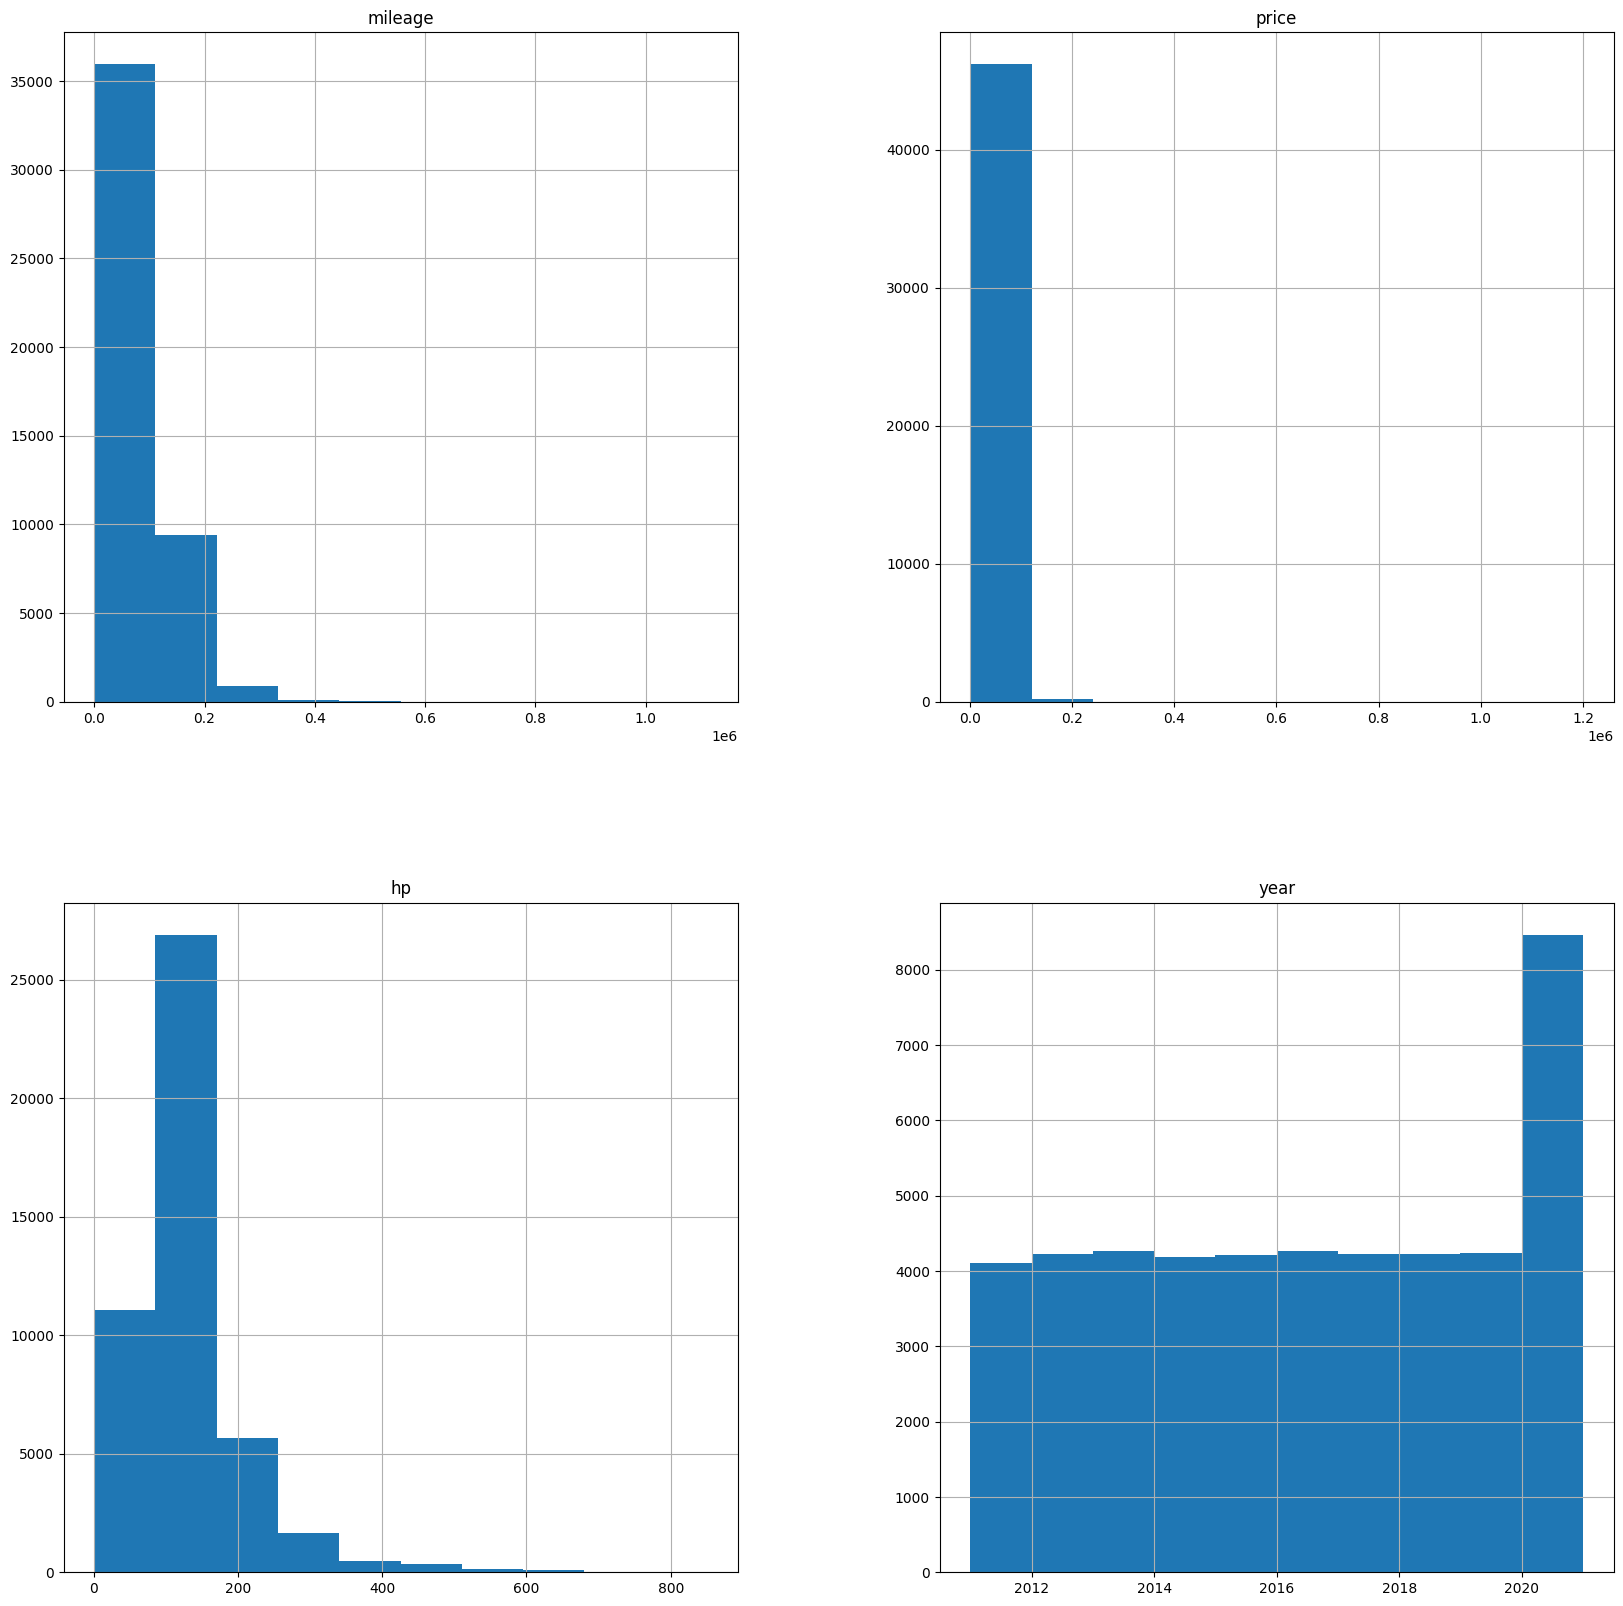

In [612]:
data.hist(figsize=(20,20))
plt.show()

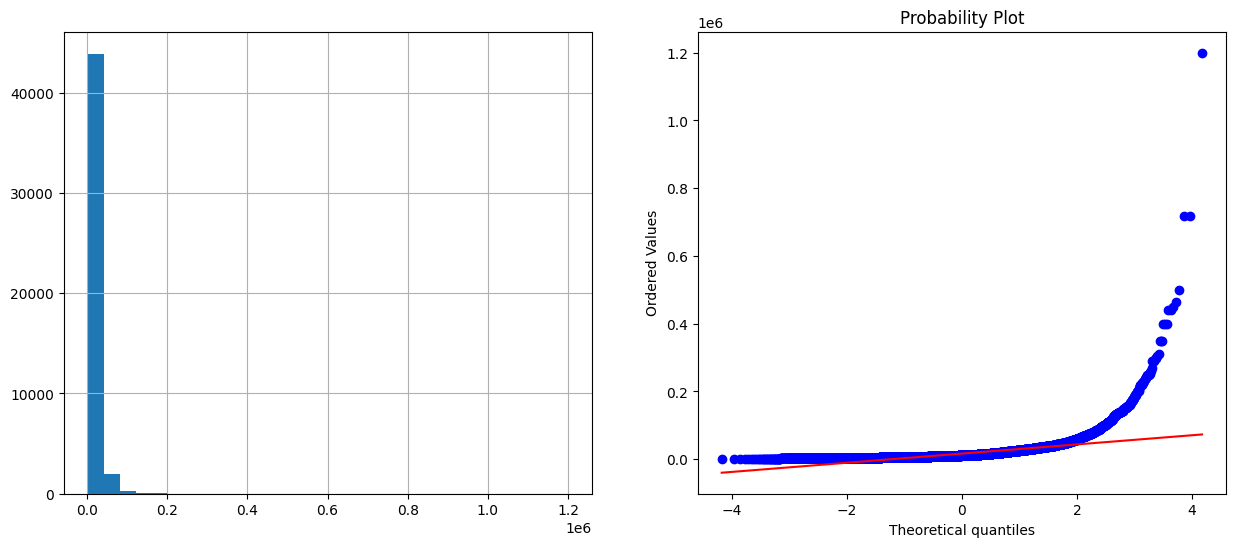

In [613]:
diagnostic_plots(data, 'price')

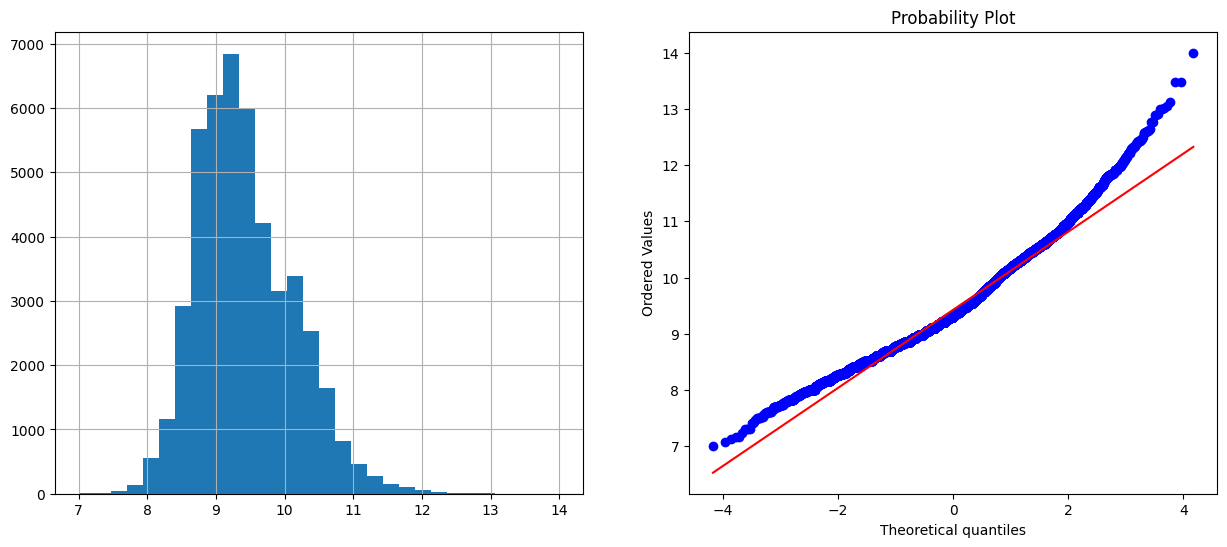

In [614]:
#Логарифмическое преобразование
data['price'] = np.log(data['price'])
diagnostic_plots(data, 'price')

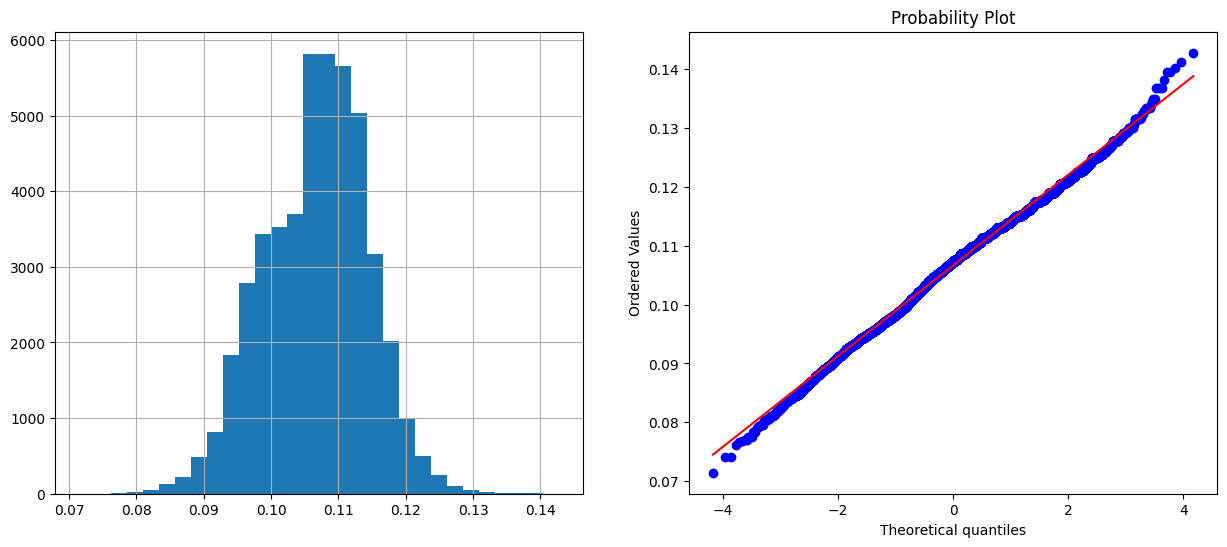

In [615]:
#Обратное преобразование
data['price_reciprocal'] = 1 / (data['price']) 
diagnostic_plots(data, 'price_reciprocal')

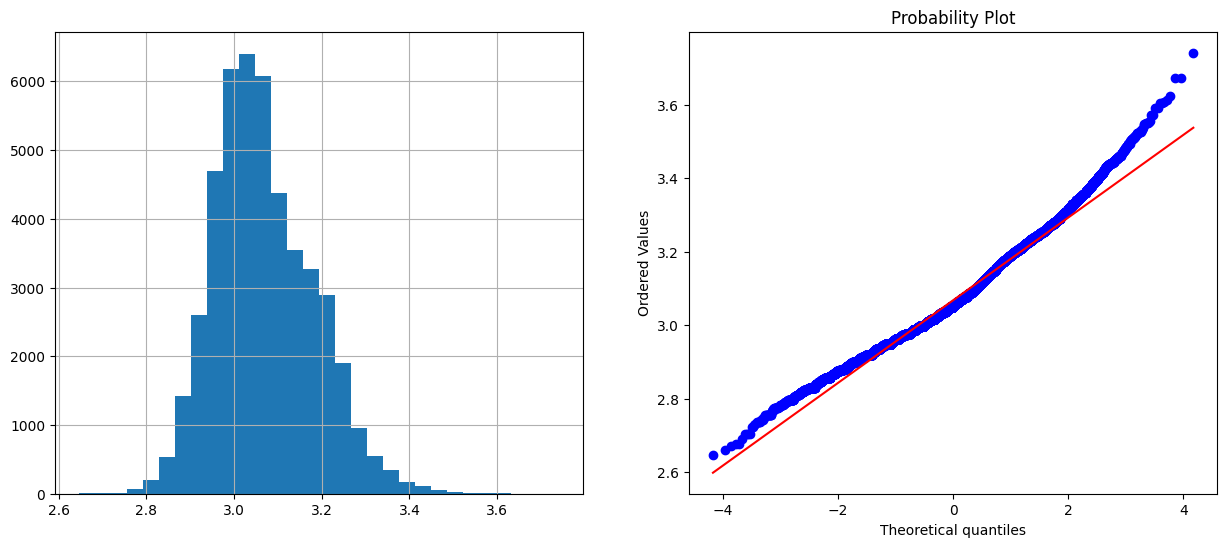

In [616]:
#Квадратный корень
data['price_sqr'] = data['price']**(1/2) 
diagnostic_plots(data, 'price_sqr')

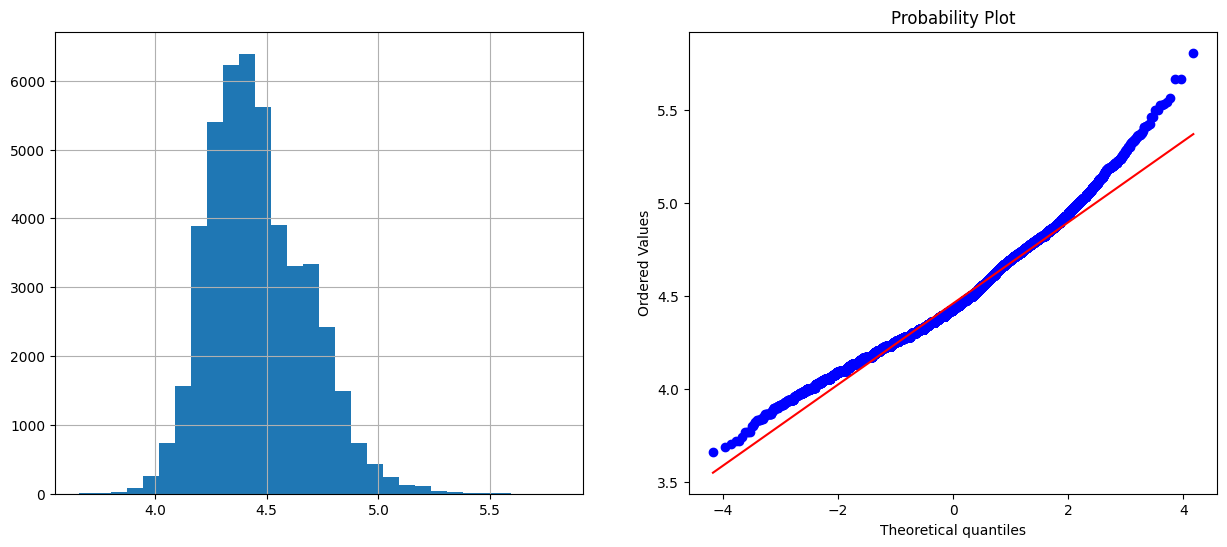

In [617]:
#Возведение в степень
data['price_exp1'] = data['price']**(1/1.5)
diagnostic_plots(data, 'price_exp1')

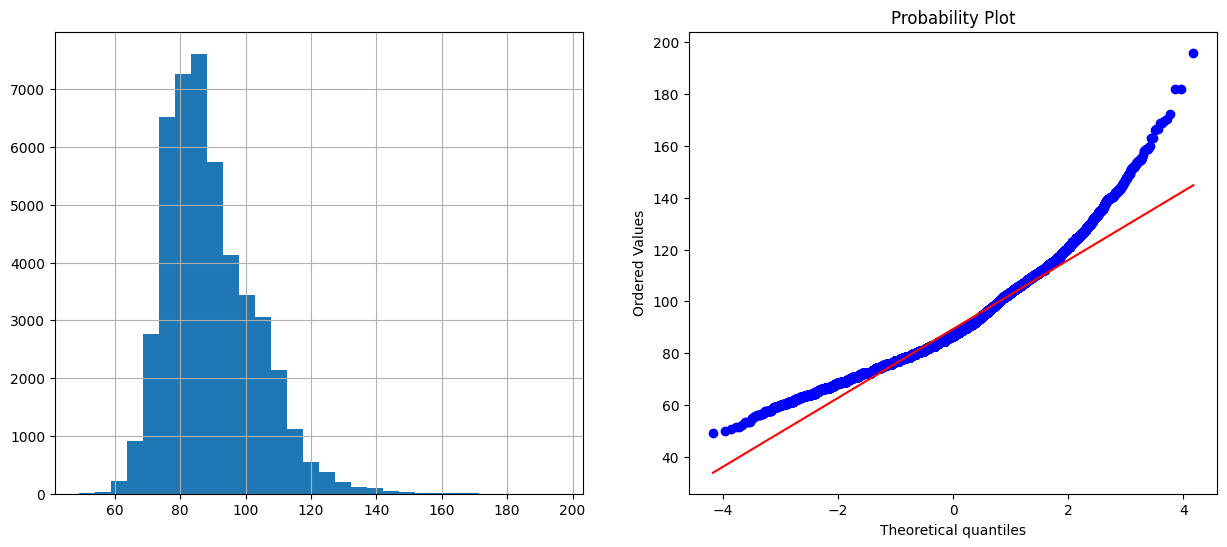

In [618]:
data['price_exp2'] = data['price']**(2)
diagnostic_plots(data, 'price_exp2')

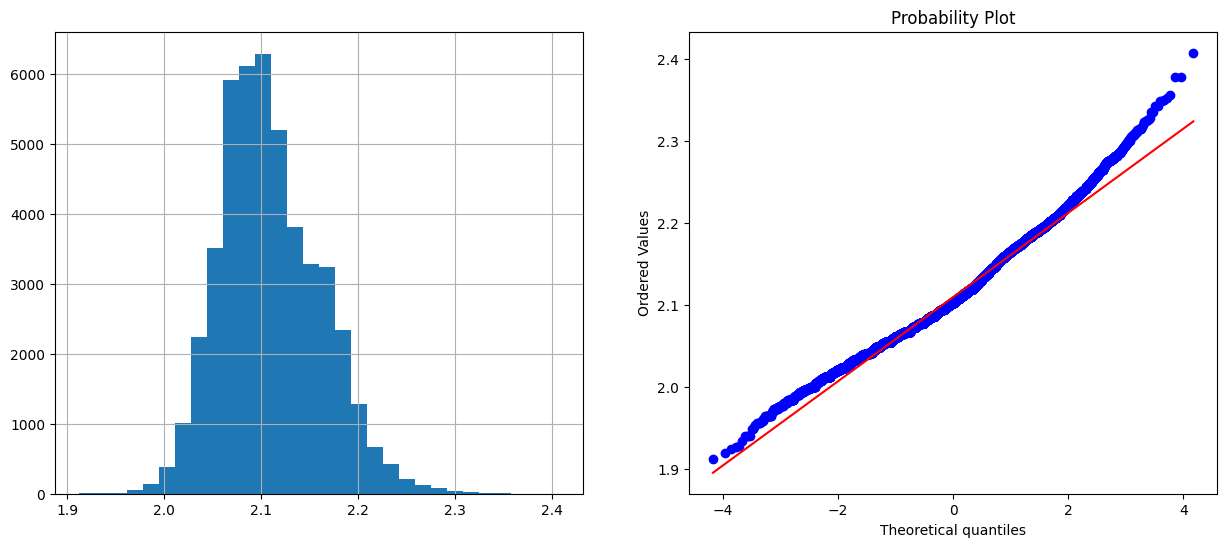

In [619]:
data['price_exp3'] = data['price']**(0.333)
diagnostic_plots(data, 'price_exp3')

Оптимальное значение λ = -1.8519809069200015


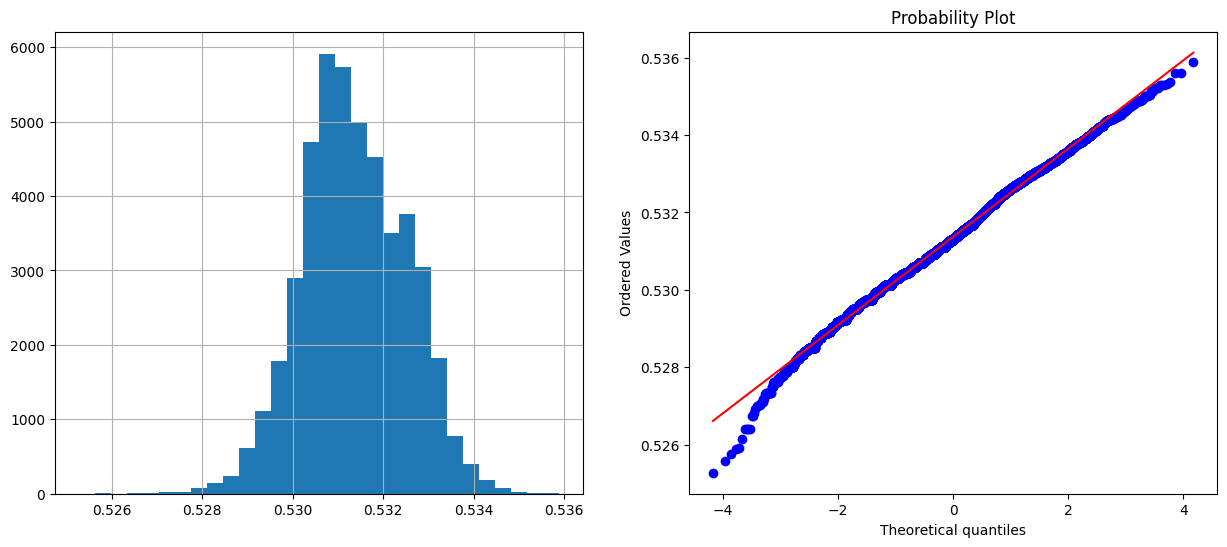

In [620]:
#Преобразованиея Бокса-Кокса
data['price_boxcox'], param = stats.boxcox(data['price']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 'price_boxcox')